# Exercise 1

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

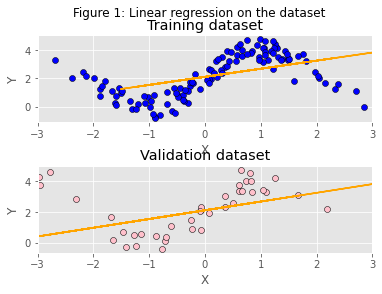

In [2]:
# EXERCISE 1
data = pd.read_csv('regression_nonlin.csv')
plt.style.use('ggplot')

# Let's say we want to split the data in 60:20:20 for train:valid:test dataset
train_size = 0.6


x = np.array(data.X).reshape((-1, 1))
y = np.array(data.y).reshape((-1, 1))

# Validation set is different from test set. Validation set actually can be regarded as a part of training se
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(x, y, train_size=0.6)

# Now since we want the valid and test size to be equal (10% each of overall data).
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(
    X_rem, y_rem, test_size=0.5, random_state=20)

# Fit the model over the training dataset
model = LinearRegression()
model.fit(X_train, y_train)

fig = plt.figure()

plt.subplots_adjust(wspace=0.2, hspace=0.5)

fig.suptitle('Figure 1: Linear regression on the dataset')

ax1 = fig.add_subplot(211)
ax1.scatter(X_train, y_train,  color='blue', edgecolors='black')
ax1.set_title('Training dataset')
ax1.set_ylabel("Y")
ax1.set_xlabel("X")
ax1.set_xlim(-3, 3)
plt.plot(X_test, model.predict(X_test), color='orange')


ax2 = fig.add_subplot(212)
ax2.scatter(X_valid, y_valid,  color='pink',
            edgecolors='black', label='Oil&Gas')
ax2.set_title('Validation dataset')
ax2.set_ylabel("Y")
ax2.set_xlabel("X")
ax2.set_xlim(-3, 3)
plt.plot(X_valid, model.predict(X_valid), color='orange')

y_pred_test = model.predict(X_test)
y_pred_valid = model.predict(X_valid)

# compute the Mean Square Error on both datasets.

test_MSE = metrics.mean_squared_error(y_test, y_pred_test)
valid_MSE = metrics.mean_squared_error(y_valid, y_pred_valid)

/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


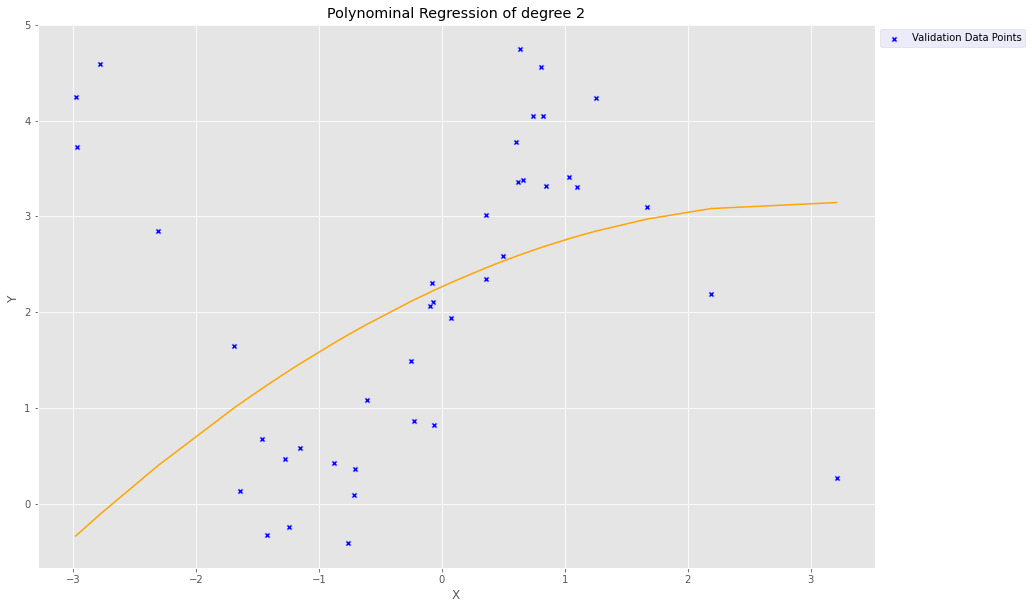

/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


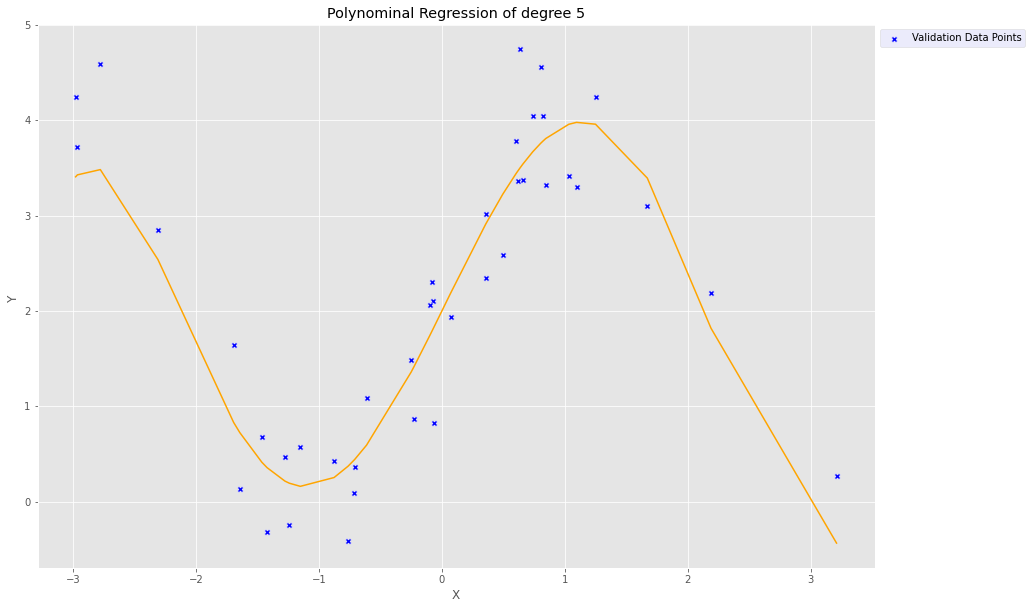

/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


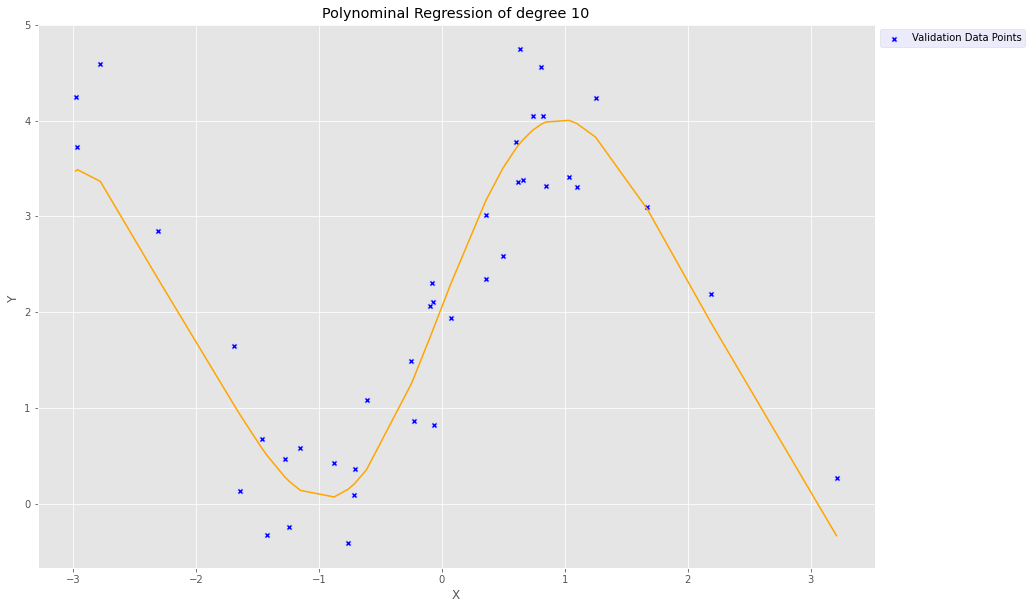

/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


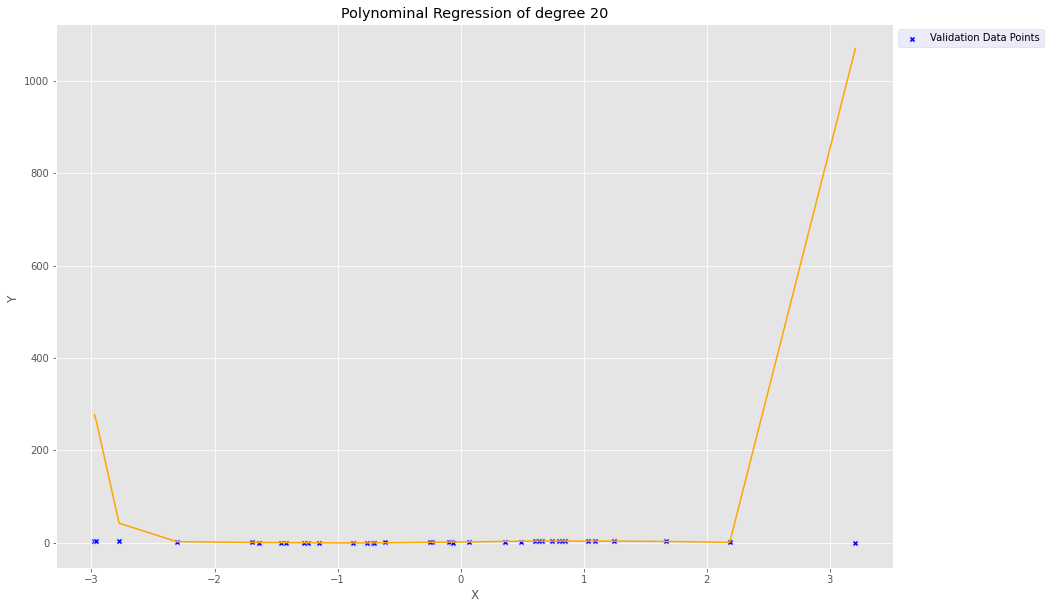

/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/edyta/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


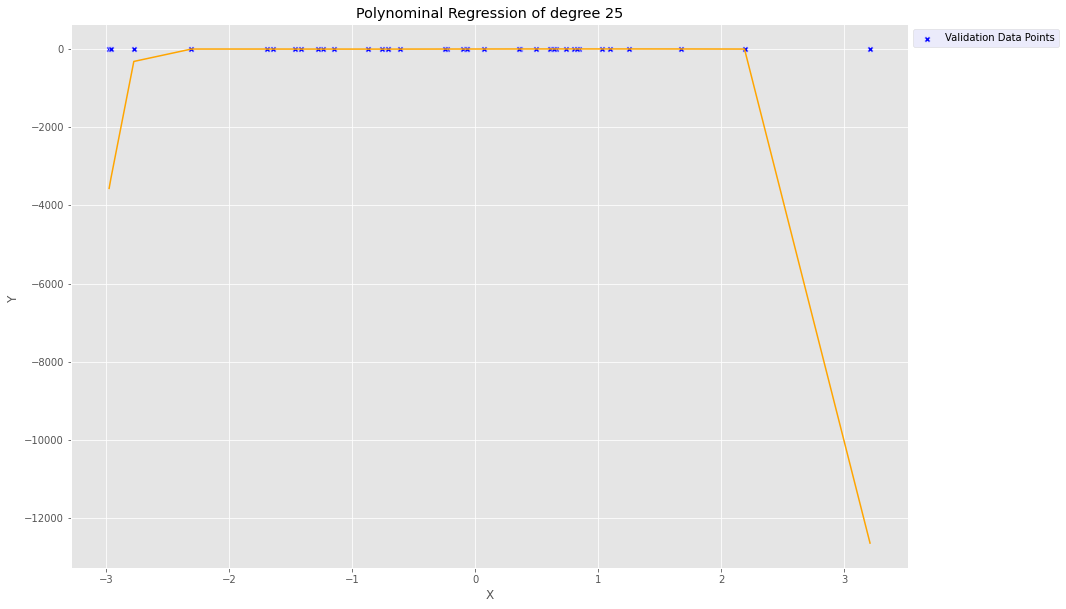

In [3]:
summary = pd.DataFrame()
summary['index name'] = ["Validation", "Train"]
summary = pd.DataFrame(summary.set_index('index name'))

# Visualizing the Polymonial Regression results



X_train = np.array(X_train).reshape(-1,1)
X_valid = np.array(X_valid).reshape(-1,1)

def viz_polymonial(deg):
    poly_X_train = PolynomialFeatures(deg).fit_transform(X_train)
    poly_X_valid = PolynomialFeatures(deg).fit_transform(X_valid)
    lr_poly = LinearRegression().fit(poly_X_train,y_train)
    y_train_poly_ = lr_poly.predict(poly_X_train)
    y_valid_poly_ = lr_poly.predict(poly_X_valid)
    plt.figure(figsize=(15, 10))
 
    sns.scatterplot(X_valid[:,0], y_valid[:,0], color='blue', edgecolors='blue',
                marker="X", label="Validation Data Points")
    sns.lineplot(X_valid[:,0], y_valid_poly_[:,0],  color='orange')
    
    #ERROR
    summary[str(deg) + " MSE"] = [metrics.mean_squared_error(y_valid, y_valid_poly_), 
                                  metrics.mean_squared_error(y_train, y_train_poly_)]   
    plt.title('Polynominal Regression of degree ' + str(deg))
    plt.xlabel('X')
    plt.ylabel('Y ')
    plt.legend(bbox_to_anchor=(1, 0.8, 0.3, 0.2),
               loc='upper left', facecolor='lavender')
    plt.show()
    return 


degrees = ([2, 5, 10, 20, 25])

for i in range(0, len(degrees)):
    viz_polymonial(degrees[i])

summary['Linear'] = [valid_MSE, test_MSE]


In [4]:
summary

,2 MSE,5 MSE,10 MSE,20 MSE,25 MSE,Linear
index name,,,,,,
Validation,2.917332,0.299918,0.311851,32140.061316,4.585781e+06,2.610486
Train,1.665589,0.284014,0.242194,0.223894,2.209542e-01,1.824923


We can determine whether a predictive model is underfitting or overfitting the training data by looking at the prediction error on the training data and the evaluation data.

Model is:

- *Underfitting* - the training data when the model performs poorly on the training data. 
    This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y). 
    
- *Overfitting* your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

 A model that is **underfit** will have high training and high testing error while an **overfit** model will have extremely low training error but a high testing error.
 
 - Overfitted - 20, 25 Polynominal Regression model?
 

